In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#定義常用函數
def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

In [3]:
#學習速率
learning_rate = 0.01

def allShape(list):
    for arr in list:
        print(arr.shape)

In [4]:
class Network(object):
    
    def __init__(self, sizes):
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.zeros((1, y)) for y in sizes[1:]]
        self.weights = [np.random.randn(x, y) - 0.5 for x, y in zip(sizes[:-1], sizes[1:])]
    
    def feedforward(self, x):
        (xs, _) = self.feedforwardRecord(x)
        return xs[-1]
    
    def feedforwardRecord(self, x):
        xs = [np.array(x)]
        ss = [np.array(x)]
        
        for b, w in zip(self.biases, self.weights):
            s = np.dot(x, w) + b
            x = sigmoid(s)
            
            xs.append(x)
            ss.append(s)
        return (xs, ss)
    
    def backpropagationWith(self, xs, ss, y):
        
        delta_out = []
        delta_in = xs[-1] - y #cross entropy loss
        
        dbs = [delta_in]
        dws = [np.dot(np.transpose(xs[-1]), delta_in)]
        
        for idx in range(self.num_layers - 2, 0, -1):
            
            delta_out = np.dot(delta_in, np.transpose(self.weights[idx]))
            delta_in = delta_out * sigmoid_prime(ss[idx])
            db = delta_in
            dw = np.dot(np.transpose(xs[idx - 1]), delta_in)
            
            dbs.insert(0, db)
            dws.insert(0, dw)
        
        return (dbs, dws)
    
    def updateWith(self, dbs, dws):
        
        new_b = []
        for b, db in zip(self.biases, dbs):
            new_b.append(b - learning_rate * db)
        
        new_w = []
        for w, dw in zip(self.weights, dws):
            new_w.append(w - learning_rate * dw)
        
        self.biases = new_b
        self.weights = new_w
    
    def showbiasesweights(self):
        allShape(self.biases)
        print(self.biases)
        allShape(self.weights)
        print(self.weights)

In [5]:
myNN = Network([2, 3, 3, 1])

In [6]:

def judgeFunction(x):
    if x[0, 0] > 0.5 and x[0, 1] < 0.5:
        return 1
    if x[0, 0] < 0.5 and x[0, 1] > 0.5:
        return 1
    return 0
'''
def judgeFunction(x):
    return float( np.sum(x) < 1)
'''

total_test = 10000000
to_print = 100000
acc = 0

for i in range(total_test):
    x = np.random.randn(1, 2)
    y = judgeFunction(x)
    (xs, ss) = myNN.feedforwardRecord(x)
    y_hat = xs[-1]
    
    (dbs, dws) = myNN.backpropagationWith(xs, ss, y)
    myNN.updateWith(dbs, dws)
    
    acc += float(y == float(y_hat > 0.5))
    if (i + 1) % to_print == 0:
        score = acc / float(to_print)
        process = int((i + 1) / to_print)
        print('{num:03d}'.format(num = process), ">", score)
        acc = 0
        if score > 0.995:
            break

001 > 0.75304
002 > 0.9791
003 > 0.98618
004 > 0.98951
005 > 0.9906
006 > 0.9912
007 > 0.99171
008 > 0.99245
009 > 0.99291
010 > 0.99302
011 > 0.99391
012 > 0.99469
013 > 0.99398
014 > 0.9948
015 > 0.99411
016 > 0.99458
017 > 0.99466
018 > 0.99516


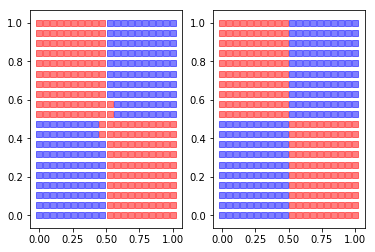

In [7]:
def colorFrom(y):
    if y > 0.5:
        return 'red'
    else:
        return 'blue'
    
plt.figure(figsize=(9, 9))
x0s = np.linspace(0, 1, 20, dtype = np.double)
x1s = np.linspace(0, 1, 20, dtype = np.double)

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
for x0 in x0s:
    for x1 in x1s:
        y = myNN.feedforward(np.array([[x0, x1]]))
        ax.scatter(x0, x1, c = colorFrom(y), s = 30, alpha = 0.5, marker = 's')
        
ax = fig.add_subplot(1,2,2)
for x0 in x0s:
    for x1 in x1s:
        y = judgeFunction(np.array([[x0, x1]]))
        ax.scatter(x0, x1, c = colorFrom(y), s = 30, alpha = 0.5, marker = 's')

plt.show()

In [8]:
myNN.showbiasesweights()

(1, 3)
(1, 3)
(1, 1)
[array([[ -7.13538663, -10.64735893,   9.06509113]]), array([[ 2.10539661,  2.12619132,  1.75338807]]), array([[-38.47537057]])]
(2, 3)
(3, 3)
(3, 1)
[array([[  0.03091564,  21.12426495,   0.12239837],
       [ 11.13582261,  -0.16172759, -18.46299018]]), array([[ 1.21070994,  4.61519336,  5.51047028],
       [-7.50400031,  6.66504914,  6.66415851],
       [ 9.39663287, -4.63533984, -4.23453842]]), array([[ 14.94557021],
       [ 16.07706423],
       [ 16.09583249]])]
